<a href="https://colab.research.google.com/github/Arch200/DatingAppAnalysis/blob/main/DatingAppComparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using pytrends to analyse the dating app market. Intended to find where each dating app is most popular, as well as when it's the most popular by google searches. This project will analyse the dating apps Tinder, Bumble and Hinge. 

In [ ]:
#installs pytrends...very necessary when using pytrends
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=b8e6e559a27133be1a736c3d75ed13cc5fd1641ea8fd3d4d05cc53c417d9d60b
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
import pandas as pd #pandas is important for dataframes
from pytrends.request import TrendReq #TrendReq is the class being used in this project
import matplotlib.pyplot as plt #how to plot the data
trends = TrendReq() #renames the class TrendReq as trends for easier name. 

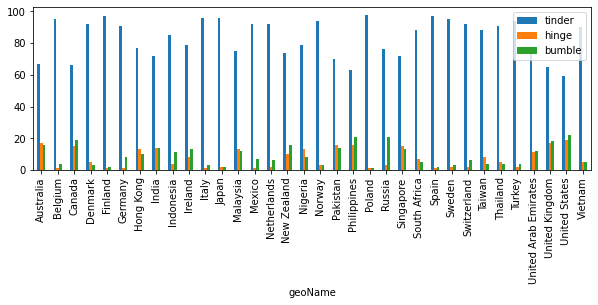

In [ ]:
#creates list of the keywords, the things we will be searching through so in this case the dating apps
kw_list=['tinder', 'hinge', 'bumble' ]

#creates payload for keyword list in specified timeframe
trends.build_payload(kw_list, timeframe='today 5-y')

#sets the region_interest variable to contain the interest by region
region_interest = trends.interest_by_region()

#sees if we have areas with no interest
region_interest = region_interest[(region_interest != 0).all(1)]

#gets rid of the null rows
region_interest.dropna(how='all',axis=0, inplace=True)

#plots into bar graph
region_interest.plot(figsize=(10, 3), y=kw_list, kind ='bar')

As anticipated, Tinder is the most popular everywhere so let's look at the data when Tinder is no longer in the keywords. 

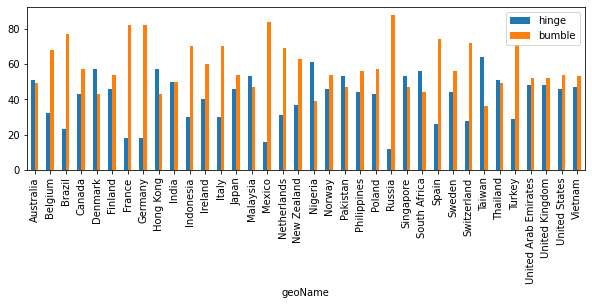

In [ ]:
#just alternating the code from the previous block very slightly
kw_list2=['hinge', 'bumble' ]

#creates payload for keyword list in specified timeframe
trends.build_payload(kw_list2, timeframe='today 5-y')

#sets the region_interest2 variable to contain the interest by region
region_interest2 = trends.interest_by_region()

#sees if we have areas with no interest
region_interest2 = region_interest2[(region_interest2 != 0).all(1)]

#gets rid of the null rows
region_interest2.dropna(how='all',axis=0, inplace=True)

#plots into bar graph
region_interest2.plot(figsize=(10, 3), y=kw_list2, kind ='bar')

This is more of a fairer battle, in places like Austalia, Taiwan and Denmark Hinge is more popular. However, in places like Mexico, Russia and France have Bumble be a lot more popular than Hinge. Only in India is it an even battle. 

Now let's analyse the historical data of these dating apps. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5251420110>,
      dtype=object)

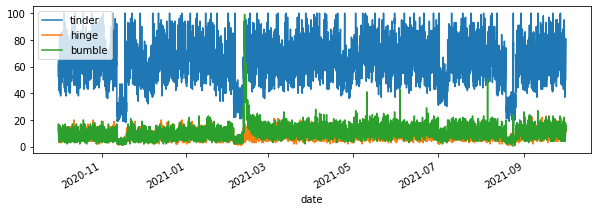

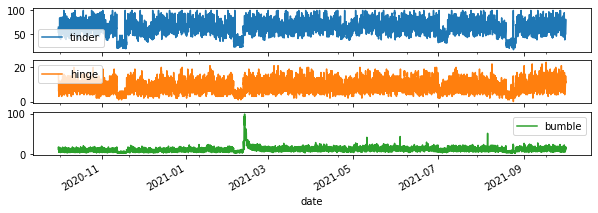

In [ ]:
#historical interest from october 2020 to october 2021
historicaldf = trends.get_historical_interest(kw_list, year_start=2020, month_start=10, day_start=1, hour_start=0, year_end=2021, month_end=10, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

#visualise
#plot a timeseries chart
historicaldf.plot(figsize=(10, 3))

#plot seperate graphs of Tinder, Bumble and Hinge's historical relevancy 
historicaldf.plot(subplots=True, figsize=(10, 3))

Whilst we can see tinder is almost always consistently popular apart from a crash in the September of 2021, plotting separately allows us to clearly see that in March 2021, Bumble was more popular than Tinder. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5250e71790>,
      dtype=object)

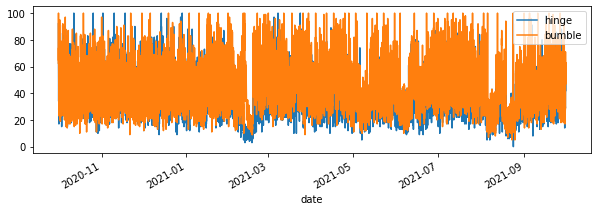

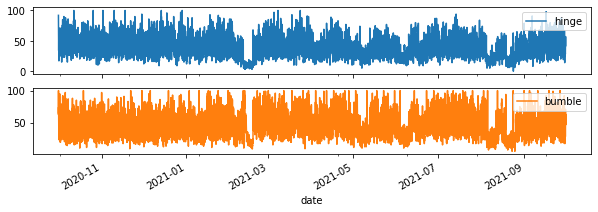

In [ ]:
#hitorical interest from 2020 to 2021 of bumble and hinge
historicaldf2 = trends.get_historical_interest(kw_list2, year_start=2020, month_start=10, day_start=1, hour_start=0, year_end=2021, month_end=10, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

#visualise
#plot a timeseries chart
historicaldf2.plot(figsize=(10, 3))

#plot seperate graphs of  Bumble and Hinge's historical relevancy 
historicaldf2.plot(subplots=True, figsize=(10, 3))

Without Tinder to dominate the graph, we see how close bumble and hinge can be at times. 

In [ ]:
#creates a dataframe of keyword suggestions relating to tinder

tinder_suggestions = trends.suggestions(keyword='tinder')
dftinder = pd.DataFrame(tinder_suggestions)
dftinder.head(5)

,mid,title,type
0,/m/0wfqsst,Tinder,App
1,/m/02fkt0,Tinder,Topic
2,/m/010nwtcd,Tinder,Company
3,/m/02wvtv,Tinderbox,Topic
4,/m/03ctrlg,Vendor,Topic


In [ ]:
#creates a dataframe of keyword suggestions relating to bumble 
bumble_suggestions = trends.suggestions(keyword='bumble')
dfbumble = pd.DataFrame(bumble_suggestions)
dfbumble.head(5)

,mid,title,type
0,/g/11g6j35tbl,Bumble,Topic
1,/g/11dymbqf4b,Bumblebee,Film
2,/m/01b_xd,Bumblebee,Insects
3,/m/08h2ks,David Lloyd,Cricketer
4,/m/0ftwtv,Bumblefoot,Infection


In [ ]:
#creates a dataframe of keyword suggestions for hinge
hinge_suggestions = trends.suggestions(keyword='hinge')
dfhinge = pd.DataFrame(hinge_suggestions)
dfhinge.head(5)

,mid,title,type
0,/g/11hd1s2dbb,Hinge,App
1,/g/122919_0,Hinge,Topic
2,/m/01lsn3,Hinge,Topic
3,/g/1222tf65,Khinkal,Dish
4,/m/09s503,Hinge joint,Topic


In [ ]:

#gets related queries to the word "bumble" that are currently rising
rising_bumble = related_queries.get('bumble').get('rising') 

#outputs the top 5 related queries 
rising_bumble.head(5)

,query,value
0,bumble superswipe,24000
1,bumble nums,19750
2,bumble ipo,13700
3,bumble bizz,9750
4,bumble aktie,5550


In [ ]:
#gets related queries to the word "tinder" that are currently rising
rising_tinder = related_queries.get('tinder').get('rising') 

#outputs the top 5 related queries 
rising_tinder.head(5)

,query,value
0,tinder swindler,50500
1,the tinder swindler,30900
2,tinder gold apk,28400
3,estafador de tinder,25700
4,tinder top picks,22000


In [ ]:

#gets related queries to the word "hinge" that are currently rising
rising_hinge = related_queries.get('hinge').get('rising') 

#outputs the top 5 related queries 
rising_hinge.head(5)

,query,value
0,hinge prompts,22400
1,how many likes on hinge,18500
2,hinge most compatible,10700
3,best hinge answers,9400
4,best hinge prompts,8750
